##PCA TO REDUCE THE DIMENSION // SUMMARIZE A LARGE NUMBER OF VARIABLES

In [2]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


In [1]:
library(tidyverse)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


##Import Data set for PCA

In [62]:
df<- read.csv(file.choose(),header=T)

In [74]:
head(df)


sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age
male,3,145,233,1,0,150,0,2.3,0,0,1,1,63
male,2,130,250,0,1,187,0,3.5,0,0,2,1,37
female,1,130,204,0,0,172,0,1.4,2,0,2,1,41
male,1,120,236,0,1,178,0,0.8,2,0,2,1,56
female,0,120,354,0,1,163,1,0.6,2,0,2,1,57
male,0,140,192,0,1,148,0,0.4,1,0,1,1,57


##Remove NAs

In [64]:
df<-na.omit(df)

##subset the data

In [65]:
sex<-select(df,sex)
heart_data<-select(df,-sex)

##Run the PCA and view the prop of variance explained by each PC

In [66]:
heart_PCA <- princomp(heart_data, cor = FALSE)

In [67]:
summary(heart_PCA)

Importance of components:
                           Comp.1     Comp.2      Comp.3     Comp.4
Standard deviation     51.8359095 23.2491038 17.43752358 7.63438268
Proportion of Variance  0.7475558  0.1503816  0.08459638 0.01621549
Cumulative Proportion   0.7475558  0.8979374  0.98253377 0.99874926
                             Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     1.1966273238 1.0101447510 0.9066255147 5.916142e-01
Proportion of Variance 0.0003983823 0.0002838895 0.0002286852 9.737767e-05
Cumulative Proportion  0.9991476444 0.9994315339 0.9996602191 9.997576e-01
                             Comp.9      Comp.10      Comp.11      Comp.12
Standard deviation     5.253004e-01 4.580450e-01 4.005818e-01 3.409430e-01
Proportion of Variance 7.677109e-05 5.837117e-05 4.464416e-05 3.234043e-05
Cumulative Proportion  9.998344e-01 9.998927e-01 9.999374e-01 9.999697e-01
                            Comp.13
Standard deviation     3.298836e-01
Proportion of Variance 3.02763

###PC1 explains about 75 percent of the variance in the data, while PC2 explains about 15 percent.

#Standard Deviation of each component

In [68]:
heart_PCA$sdev^2

Comp.1       Comp.2       Comp.3       Comp.4       Comp.5       Comp.6 
2686.9615113  540.5208283  304.0672288   58.2837989    1.4319170    1.0203924 
      Comp.7       Comp.8       Comp.9      Comp.10      Comp.11      Comp.12 
   0.8219698    0.3500074    0.2759406    0.2098052    0.1604658    0.1162421 
     Comp.13 
   0.1088232

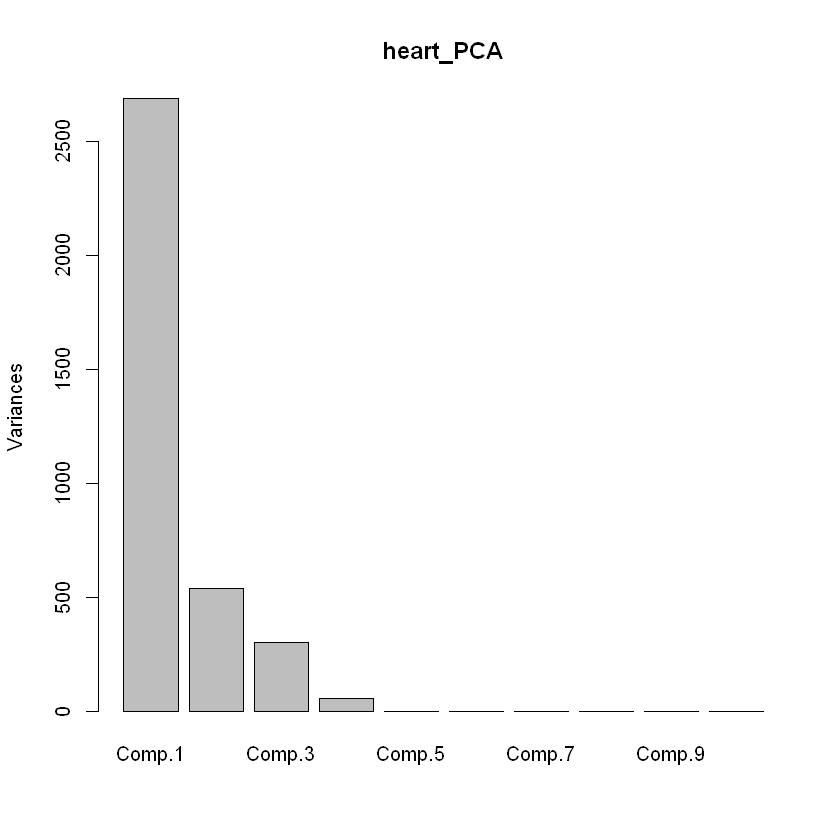

In [70]:
plot(heart_PCA)

In [72]:
loadings(heart_PCA)


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
cp                                    0.364  0.679  0.582  0.162               
trestbps        -0.104  0.982 -0.148                                           
chol     -0.998                                                                
fbs                                                               0.103  0.113 
restecg                                                          -0.915  0.368 
thalach          0.977  0.129  0.166                                           
exang                                -0.117        -0.117  0.111  0.109        
oldpeak                              -0.742  0.552 -0.110 -0.116 -0.147 -0.306 
slope                                 0.220 -0.223               -0.298 -0.859 
ca                                   -0.424 -0.411  0.788                      
thal                                 -0.166                0.945               
target                       

###Cholestorol is variable that drives the relationship (-0.998)

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"

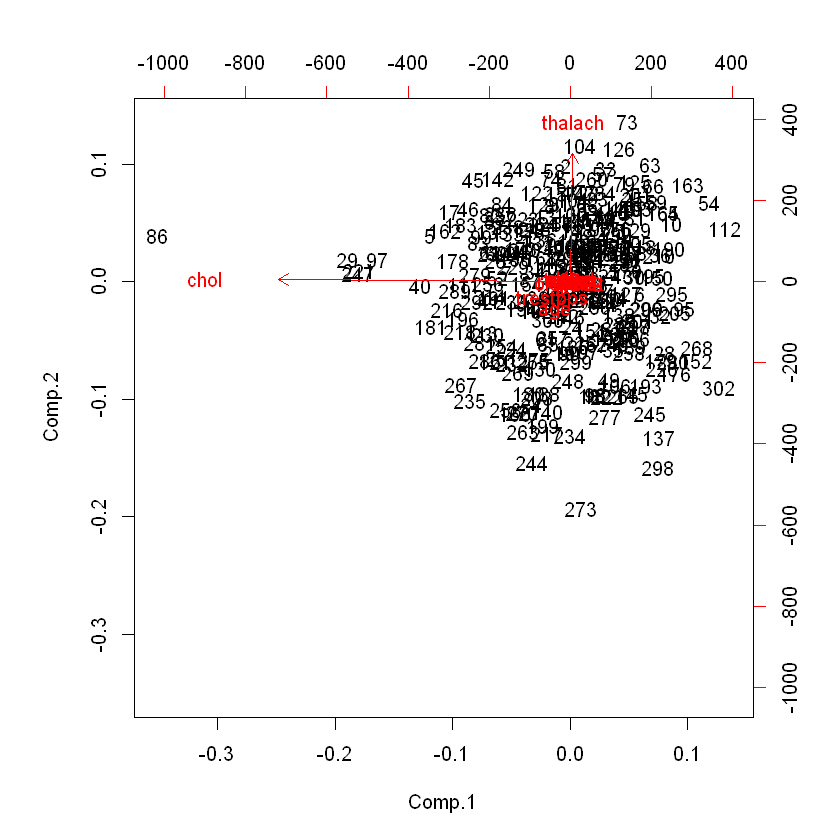

In [73]:
biplot(heart_PCA)

In [33]:
#install.packages("ggbiplot")

Warning message:
"package 'ggbiplot' is not available (for R version 3.6.1)"

In [36]:
#install.packages("devtools")

also installing the dependencies 'glue', 'cli', 'rcmdcheck', 'sessioninfo'




  There are binary versions available but the source versions are later:
            binary source needs_compilation
glue         1.4.2  1.6.2              TRUE
cli          2.5.0  3.2.0              TRUE
rcmdcheck    1.3.3  1.4.0             FALSE
sessioninfo  1.1.1  1.2.2             FALSE
devtools     2.4.1  2.4.3             FALSE

  Binaries will be installed
package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\patri\anaconda3\envs\rlanguage\Lib\R\library\00LOCK\glue\libs\x64\glue.dll to C:\Users\patri\anaconda3\envs\rlanguage\Lib\R\library\glue\libs\x64\glue.dll: Permission denied"Warning message:
"restored 'glue'"

package 'cli' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\patri\AppData\Local\Temp\RtmpmOLZ1X\downloaded_packages


installing the source packages 'rcmdcheck', 'sessioninfo', 'devtools'

Warning message in install.packages("devtools"):
"installation of package 'sessioninfo' had non-zero exit status"Warning message in install.packages("devtools"):
"installation of package 'rcmdcheck' had non-zero exit status"Warning message in install.packages("devtools"):
"installation of package 'devtools' had non-zero exit status"

In [37]:
#library(devtools)
#install_github("vqv/ggbiplot")

ERROR: Error in library(devtools): there is no package called 'devtools'


In [ ]:
#ggbiplot(fa_pca, choices=c(1,2),  obs.scale = 1, var.axes=TRUE,  varname.size=3, var.scale = 1, ellipse=TRUE,  group=df$club_position)+
  labs(color="club_position")+
  theme_classic()